In [0]:
import numpy as np
import math
from matplotlib import pyplot as plt
from skimage import io

In [0]:
!wget -q -nc https://raw.githubusercontent.com/pseprivamirakbarnejad/cmput206lab/master/Lab4/PeppersBayerGray.bmp
!wget -q -nc https://raw.githubusercontent.com/pseprivamirakbarnejad/cmput206lab/master/Lab4/gridR.bmp
!wget -q -nc https://raw.githubusercontent.com/pseprivamirakbarnejad/cmput206lab/master/Lab4/gridG.bmp
!wget -q -nc https://raw.githubusercontent.com/pseprivamirakbarnejad/cmput206lab/master/Lab4/gridB.bmp
!ls

gridB.bmp  gridG.bmp  gridR.bmp  PeppersBayerGray.bmp  sample_data


In [0]:
filename_Grayimage = 'PeppersBayerGray.bmp'
filename_gridB = 'gridB.bmp'
filename_gridR = 'gridR.bmp'
filename_gridG = 'gridG.bmp'

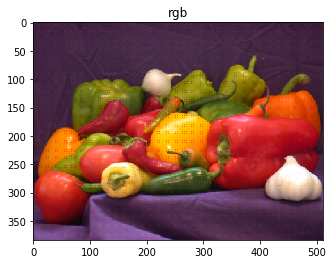

In [0]:

# part I

img = io.imread(filename_Grayimage, as_gray =True)

h,w = img.shape

# our final image will be a 3 dimentional image with 3 channels
rgb = np.zeros((h,w,3),np.uint8);


# reconstruction of the green channel IG

IG = np.copy(img) # copy the image into each channel

for row in range(0,h,4): # loop step is 4 since our mask size is 4.
    for col in range(0,w,4): # loop step is 4 since our mask size is 4.
        #B
        IG[row,col+1]=(int(img[row,col])+int(img[row,col+2]))/2
        #O
        IG[row+3,col+2]=(int(img[row+3,col+1])+int(img[row+3,col+3]))/2
        #E
        IG[row+1,col]=(int(img[row,col])+int(img[row+2,col+2]))/2
        #L
        IG[row+2,col+3]=(int(img[row+3,col+3])+int(img[row+1,col+3]))/2
        #M
        IG[row+3,col]= (int(img[row+2,col])+int(img[row+3,col+1]))/2
        #D
        IG[row,col+3]=(int(img[row,col+2])+int(img[row+1,col]))/2
        #G
        IG[row+1,col+2]=(int(img[row,col+2])+int(img[row+1,col+1])+int(img[row+2,col+2])+int(img[row+1,col+3]))/4
        #J
        IG[row+2,col+1]=(int(img[row+1,col+1])+int(img[row+2,col])+int(img[row+3,col+1])+int(img[row+2,col+2]))/4
        

# reconstruction of the red channel IR
IR = np.copy(img)

for row in range(0,h,4): # loop step is 4 since our mask size is 4.
    for col in range(0,w,4): # loop step is 4 since our mask size is 4.
        #C
        IR[row,col+2]=(int(img[row,col+1])+int(img[row,col+3]))/2
        #F
        IR[row+1,col+1]=(int(img[row+2,col+1])+int(img[row,col+1]))/2
        #H
        IR[row+1,col+3]=(int(img[row+2,col+3])+int(img[row,col+3]))/2
        #K
        IR[row+2,col+2]=(int(img[row+2,col+1])+int(img[row+2,col+3]))/2
        #G
        IR[row+1,col+2]=(int(img[row,col+1])+int(img[row,col+3])+int(img[row+2,col+1])+int(img[row+2,col+3]))/4
        #FIRST COLUMN
        IR[row,col] = IR[row,col+1]
        IR[row+1,col] = IR[row+1,col+1]
        IR[row+2,col] = IR[row+2,col+1]
        IR[row+3,col] = IR[row+2,col+1]
        #LAST RAW
        IR[row+3,col+1] = IR[row+2,col+1]
        IR[row+3,col+2] = IR[row+2,col+2]
        IR[row+3,col+3] = IR[row+2,col+3]

# reconstruction of the blue channel IB
IB = np.copy(img)

for row in range(0,h,4): # loop step is 4 since our mask size is 4.
    for col in range(0,w,4): # loop step is 4 since our mask size is 4.
        #F
        IB[row+1,col+1]=(int(img[row+1,col])+int(img[row+1,col+2]))/2
        #I
        IB[row+2,col]=(int(img[row+1,col])+int(img[row+3,col]))/2
        #K
        IB[row+2,col+2]=(int(img[row+1,col+2])+int(img[row+3,col+2]))/2
        #N
        IB[row+3,col+1]=(int(img[row+3,col])+int(img[row+3,col+2]))/2
        #J
        IB[row+2,col+1]=(int(img[row+1,col])+int(img[row+3,col])+int(img[row+1,col+2])+int(img[row+3,col+2]))/4
        #FIRST ROW
        IB[row,col] = IB[row+1,col]
        IB[row,col+1] = IB[row+1,col+1]
        IB[row,col+2] = IB[row+1,col+2]
        IB[row,col+3] = IB[row+1,col+2]
        #LAST COLUMN
        IB[row+1,col+3] = IB[row+1,col+2]
        IB[row+2,col+3] = IB[row+2,col+2]
        IB[row+3,col+3] = IB[row+3,col+2]

# merge the channels
rgb[:,:,0]=IR
rgb[:,:,1]=IG
rgb[:,:,2]=IB

plt.imshow(rgb),plt.title('rgb')
plt.show()